In [1]:
import os
os.chdir('..')
os.getcwd()

import pandas as pd
pd.set_option('display.max_columns', 200)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from src.preprocessing import preprocess_data
from src import config

In [2]:
data = pd.read_csv("data/data_literacy_students.csv")

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# data preprocessing step
preprocessed_data = preprocess_data(data)

In [4]:
# selecting students who are not currently studying
preprocessed_data = preprocessed_data[(preprocessed_data["DROPPED_TARGET"].notna())]
dropped = preprocessed_data["DROPPED_TARGET"].values

# drop columns irrelevant for this analysis 
truncated_data = preprocessed_data.drop(columns=config.MODEL_DROP_COLUMNS)

In [5]:
# applying PCA to data
pca = PCA(n_components=2)
pca.fit(truncated_data)

points_2d_pca = pca.transform(truncated_data)
df_2d_pca = pd.DataFrame(points_2d_pca, columns=["x", "y"])
df_2d_pca["dropped"] = dropped

In [6]:
# applying t-SNE to data
tsne = TSNE(n_components=2, perplexity=35)
points_2d_tsne = tsne.fit_transform(truncated_data) 

df_2d_tsne = pd.DataFrame(points_2d_tsne, columns=["x", "y"])
df_2d_tsne["dropped"] = dropped

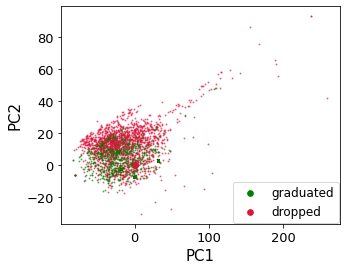

In [60]:
# plotting PCA
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
axs.scatter(df_2d_pca[df_2d_pca["dropped"] == 0].x, df_2d_pca[df_2d_pca["dropped"] == 0].y, 
               s=1, alpha=0.5, c="crimson")
axs.scatter(df_2d_pca[df_2d_pca["dropped"] == 1].x, df_2d_pca[df_2d_pca["dropped"] == 1].y, 
               s=1, alpha=0.5, c="green")

axs.set_xlabel("PC1", fontsize=15)
axs.set_ylabel("PC2", fontsize=15)
axs.tick_params(axis='both', which='major', labelsize=13)
axs.scatter([0], [0], s=32, c="green", label="graduated")
axs.scatter([0], [0], s=32, c="crimson", label="dropped")
axs.legend(loc=(0.618, 0.002), fontsize=12)
extent = axs.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

fig.savefig("gfx/pca.pdf", bbox_inches=extent.expanded(1.4, 1.4))
plt.show()

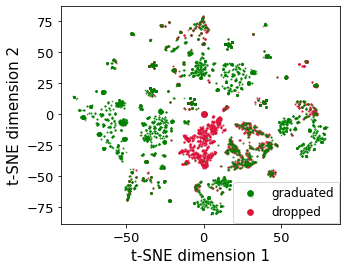

In [61]:
# plotting t-SNE
fig, axs = plt.subplots(1, 1, figsize=(5, 4))

axs.scatter(df_2d_tsne[df_2d_tsne["dropped"] == 0].x, df_2d_tsne[df_2d_tsne["dropped"] == 0].y, 
               s=1, alpha=0.5, c="crimson")
axs.scatter(df_2d_tsne[df_2d_tsne["dropped"] == 1].x, df_2d_tsne[df_2d_tsne["dropped"] == 1].y, 
               s=1, alpha=0.5, c="green")

axs.set_xlabel("t-SNE dimension 1", fontsize=15)
axs.set_ylabel("t-SNE dimension 2", fontsize=15)
axs.tick_params(axis='both', which='major', labelsize=13)
axs.scatter([0], [0], s=32, c="green", label="graduated")
axs.scatter([0], [0], s=32, c="crimson", label="dropped")
axs.legend(loc=(0.618, 0.002), fontsize=12)

extent = axs.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("gfx/tsne.pdf", bbox_inches=extent.expanded(1.4, 1.4))
plt.show()